In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np
import os

from Config import get_data_dir
from Misc import get_sc_strength, get_cf_score, get_d_gap, get_h_gap


In [2]:
results_dir = './FindSCs'

results = {}
for file in os.listdir(results_dir):
    with open('{}/{}'.format(results_dir, file)) as f:
        data = json.load(f)
        results[file.split('.')[0]] = data

In [3]:


def run(results, score_min = 0, gap_min = 0, verbose = False, save = False):
    names = []
    strengths = []
    scores = []
    d_gaps = []
    h_gaps = []
    
    out = {}
    
    for name in results:
        data = results[name]
        
        strength = get_sc_strength(data)
        score = get_cf_score(data)
        d_gap = get_d_gap(data)
        h_gap = get_h_gap(data)
        
        if score != -1 and d_gap != -1 and h_gap != 1:
            if score >= score_min and (np.abs(d_gap) > gap_min or np.abs(h_gap) > gap_min):
                names.append(name)
                strengths.append(strength)
                scores.append(score)
                d_gaps.append(d_gap)
                h_gaps.append(h_gap)
                
                if verbose:
                    print(name, strength, score, d_gap, h_gap)
                    out[name] = data
    
    if save:
        with open('FindSCs.json', 'w') as f:
            json.dump(out, f)
            
    plt.scatter(scores, strengths)
    plt.ylabel('SC Strength')
    plt.xlabel('CF Score')
    plt.show()
    plt.close()
    
    plt.scatter(scores, d_gaps)
    plt.ylabel('Detection Gap')
    plt.xlabel('CF Score')
    plt.show()
    plt.close()

    plt.scatter(scores, h_gaps)
    plt.ylabel('Hallucination Gap')
    plt.xlabel('CF Score')
    plt.show()
    plt.close()

    plt.scatter(strengths, d_gaps)
    plt.ylabel('Detection Gap')
    plt.xlabel('SC Strength')
    plt.show()
    plt.close()

    plt.scatter(strengths, h_gaps)
    plt.ylabel('Hallucination Gap')
    plt.xlabel('SC Strength')
    plt.show()
    plt.close()

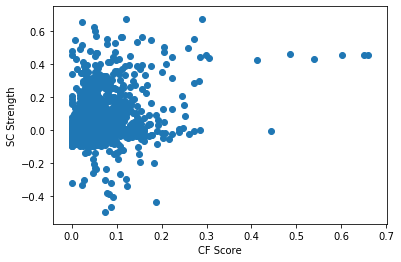

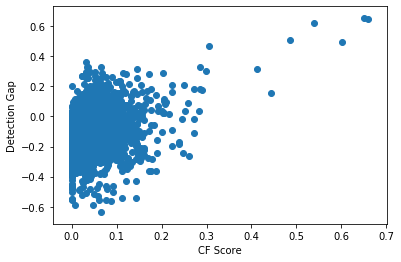

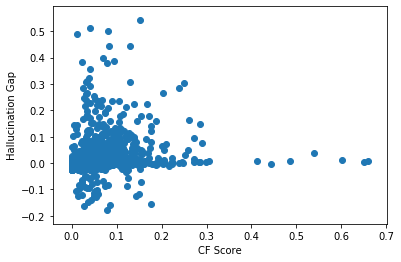

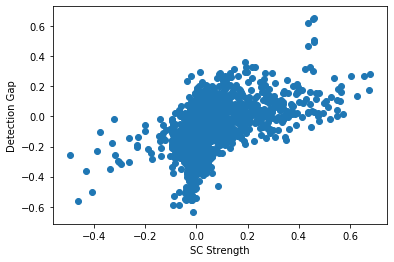

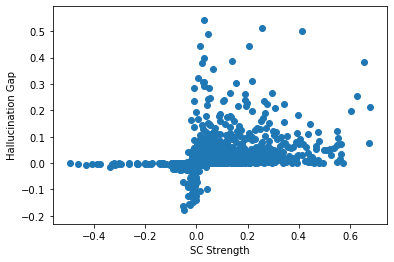

In [4]:
run(results)

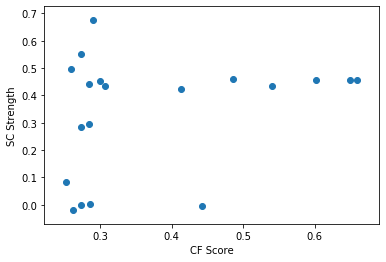

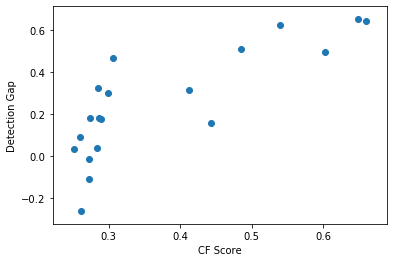

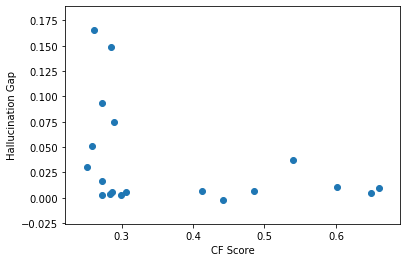

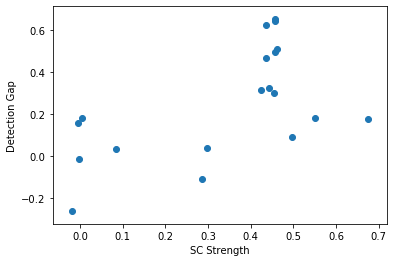

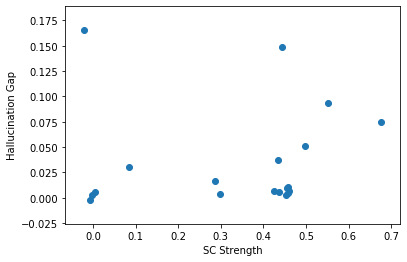

In [5]:
run(results, score_min = 0.25)

surfboard-person 0.43599999999999994 0.3060921248142645 0.46671988014686927 0.0060119480207422304
knife-person 0.0040000000000000036 0.2860169491525424 0.18069512216149108 0.005812433733142441
tennis+racket-person 0.46099999999999997 0.48497470990776553 0.5089304229441094 0.006920270349348168
fork-dining+table 0.676 0.2890625 0.17892414318668648 0.0746132616998546
skateboard-person 0.45399999999999996 0.29909277143693297 0.30028819015590047 0.0025106519327428023
baseball+glove-person 0.45799999999999996 0.649500384319754 0.6521906225980015 0.00423636894410917
baseball+bat-person 0.45599999999999996 0.6596689543802987 0.6445644759372434 0.009227329448957544
knife-dining+table 0.552 0.2730263157894737 0.18174721394681673 0.09317577344192762
sports+ball-person 0.43499999999999994 0.5401513302416402 0.623590062203682 0.03735911216315457
cup-dining+table 0.443 0.284676212865997 0.3264505890119034 0.1490264641314739
person-airplane -0.019999999999999997 0.2609542356377799 -0.2617617813827568

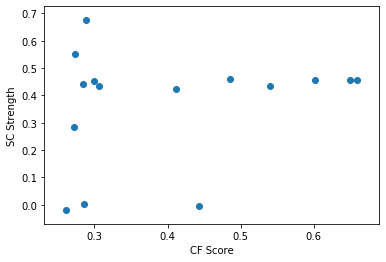

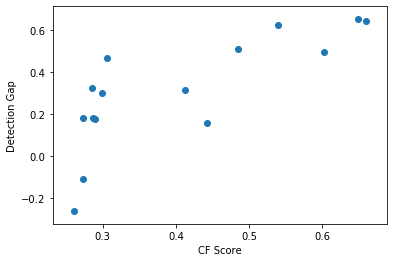

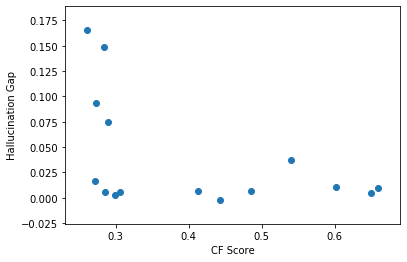

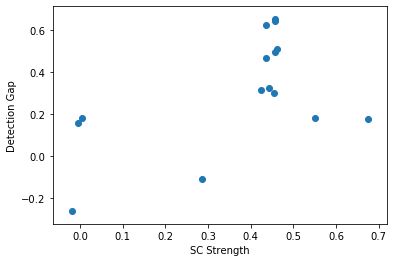

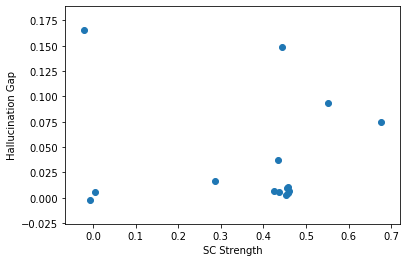

In [6]:
run(results, score_min = 0.25, gap_min = 0.1, verbose = True, save = True)

In [7]:

# Find which pairs require us to go and find more data
with open('./FindSCs.json', 'r') as f:
    pairs = json.load(f)
    
for pair in pairs:
    
    with open('{}/val/splits/{}.json'.format(get_data_dir(), pair), 'r') as f:
        splits = json.load(f)
        
    for key in splits:
        if len(splits[key]) < 25:
            print(pair, key)


surfboard-person just_main
tennis+racket-person just_main
skateboard-person just_main
baseball+glove-person just_main
baseball+bat-person just_main
sports+ball-person just_main
skis-person just_main
broccoli-dining+table both
tie-person just_main
toothbrush-person both
toothbrush-person just_main
